This dataset is super clean.  Features are all great. 
Most real world data is not this nice. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy import stats

In [2]:
pd.options.display.float_format = '{:20,.3f}'.format

In [3]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["figure.figsize"] = (10,8)

In [4]:
# from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import median_absolute_error, r2_score

In [5]:
np.set_printoptions(precision=2,
                       threshold=10000,
                       linewidth=150,
                       suppress=True)

In [6]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [7]:
#create DataFrame: first get X, then get y by just defining the new column
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: this is in dataset.target, which is the median value of owner-occupied homes in $1000s

### Target variable distribution


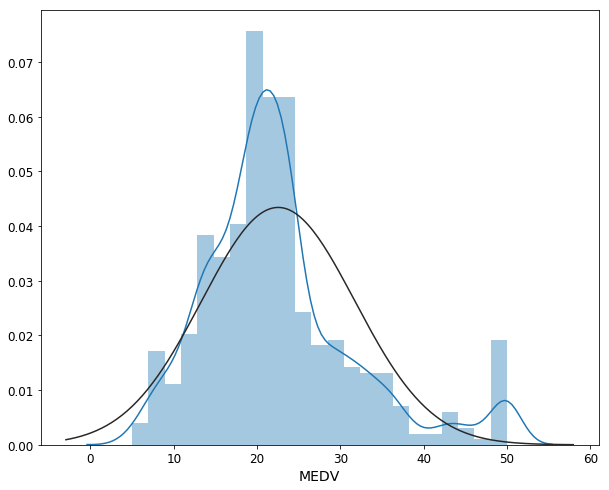

In [9]:
#sns.distplot(df.loan_amnt,color =’k’, fit=norm)
sns.distplot(df['MEDV'], fit=norm)

In [10]:
type(stats.norm.fit(df.MEDV))

tuple

In [11]:
mu, sigma = stats.norm.fit(df.MEDV)
mu, sigma

(22.532806324110677, 9.188011545278203)

In [12]:
#test statistics, p-value
stats.shapiro(df.MEDV)

(0.9171748757362366, 4.940195786292171e-16)

In [13]:
#If the returned statistic is larger than these critical values then for the corresponding significance level, 
# the null hypothesis that the data come from the chosen distribution can be rejected. 
stats.anderson(df.MEDV, dist='norm')

AndersonResult(statistic=11.822483502722775, critical_values=array([0.57, 0.65, 0.78, 0.91, 1.08]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [14]:
stats.kstest(df.MEDV, 'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

## Correlations

In [15]:
# most practical
# most positively correlated with number of rooms
# most negatively correlated with LSTAT: Percentage of lower status of the population
df.corr().round(2).style.background_gradient()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.06,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.06,-0.04,0.06,1,0.09,0.09,0.09,-0.1,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.1,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.01,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


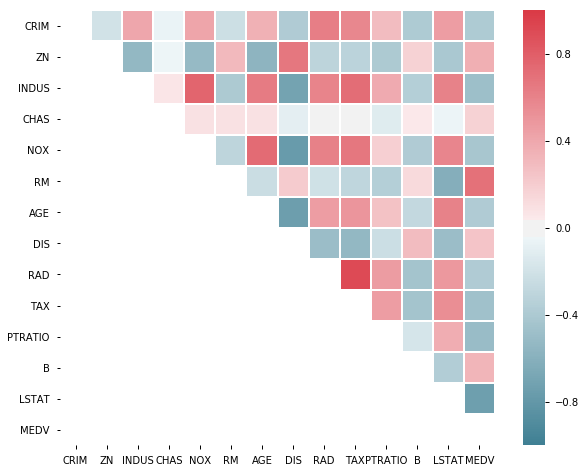

In [16]:
#Nice looking
sns.set_context(context='notebook')
fig, ax = plt.subplots()
corr = df.corr()
mask = np.zeros_like(corr, dtype =np.bool)
mask[np.tril_indices_from(mask)] =True
cmap =sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, linewidths=1, vmin=-1, vmax =1, square=True, cbar=True, center=0, ax=ax, mask=mask)

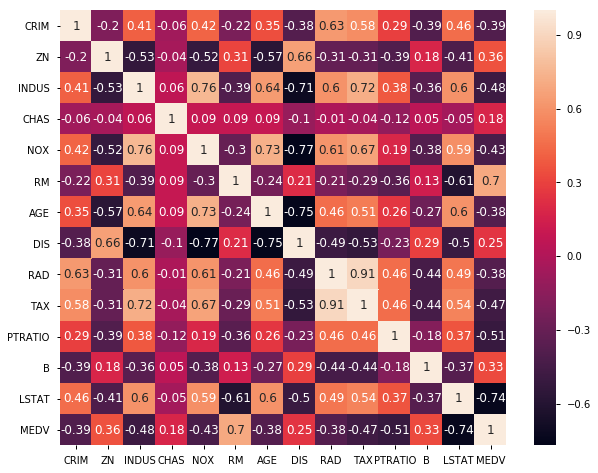

In [17]:
# this is much uglier.
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Visualize correlation: scatterplot of target and features

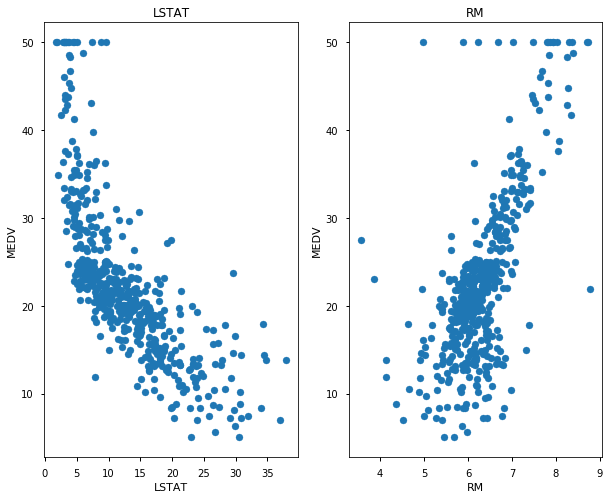

In [18]:
features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')